In [53]:

import torch
import torch.nn.functional as F
import random
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import networkx as nx
import math
from data import Poisson_samples
from torch.distributions import Poisson
import torch_geometric
from torch_geometric.nn import GCNConv
from torch_geometric.datasets import Planetoid
from RC import torchRC
from config import Config as config
from torch_geometric.data import Data



(100, 100)


-1.4679819932801421
0.2443313584567941
tensor(-0.3734, grad_fn=<MeanBackward0>)
tensor(0.0760, grad_fn=<StdBackward0>)
tensor(-0.2556, grad_fn=<MeanBackward0>)
tensor(0.0630, grad_fn=<StdBackward0>)


In [110]:
edge_index = torch.tensor(np.where(A!=0), dtype=torch.long)
x = torch.tensor([[i] for i in range(100)], dtype=torch.float32) # torch.rand(100, 1, dtype=torch.float)
y = torch.rand(100, 1, dtype=torch.float) * 0.1 + torch.sin(torch.tensor([[i] for i in range(100)]))
# e = torc
data = Data(x=x, edge_index=edge_index, y=y, edge_attr=x)

In [112]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(1, 16, improved=True) # dataset.num_node_features
        self.conv2 = GCNConv(16, 1, improved=True) # dataset.num_classes

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index) # TODO 图卷积使用二值邻接矩阵还是实数邻接矩阵？
        x = F.relu(x)
        # x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        return x # F.log_softmax(x, dim=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
# data = dataset[0].to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.02, weight_decay=5e-4)

model.train()
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    # print(out.shape, data.y.shape)
    loss = F.mse_loss(out, data.y)
    print(epoch, loss.item())
    loss.backward()
    optimizer.step()

0 0.505687415599823
1 0.505687415599823
2 0.505687415599823
3 0.5418736934661865
4 0.505687415599823
5 0.505687415599823
6 0.505687415599823
7 0.505687415599823
8 0.505687415599823
9 0.505687415599823
10 0.505687415599823
11 0.505687415599823
12 0.505687415599823
13 0.505687415599823
14 0.505687415599823
15 0.505687415599823
16 0.505687415599823
17 0.505687415599823
18 0.505687415599823
19 0.505687415599823
20 0.505687415599823
21 0.505687415599823
22 0.505687415599823
23 0.505687415599823
24 0.505687415599823
25 0.505687415599823
26 0.505687415599823
27 0.505687415599823
28 0.505687415599823
29 0.505687415599823
30 0.505687415599823
31 0.505687415599823
32 0.505687415599823
33 0.505687415599823
34 0.505687415599823
35 0.505687415599823
36 0.505687415599823
37 0.505687415599823
38 0.505687415599823
39 0.505687415599823
40 0.505687415599823
41 0.505687415599823
42 0.505687415599823
43 0.505687415599823
44 0.505687415599823
45 0.505687415599823
46 0.505687415599823
47 0.505687415599823
4

In [19]:
import torch
from RC import torchRC
from config import Config as config
from data import PoissonDataset, part_DATA
from train_gpu import learn


In [21]:
model = torchRC(config)
with torch.no_grad():
    for i in range(config.N_hid):
        for j in range(config.N_hid):
            if torch.rand(1) < 0.2:
                model.As[0][i,j] = 0.

In [22]:

if config.data == 'poisson':
    train_loader, test_loader = PoissonDataset(config)
else:
    train_loader, test_loader = part_DATA(config)
loss = learn(model, train_loader, test_loader, config)

UnboundLocalError: local variable 'train_dataset' referenced before assignment

In [40]:
spike.shape

torch.Size([100, 50])

In [22]:
from RC import torchRC
from config import Config as config
config.device = 'cpu'
config.N_in = 50
config.frames = 100
config.batch_size = 32
model = torchRC(config)

In [139]:
# nx.in_degree_centrality(G)
# nx.out_degree_centrality(G)
nx.closeness_centrality(G)

{0: 0.4166666666666667,
 1: 0.7142857142857143,
 2: 0.5,
 3: 0.5555555555555556,
 4: 0.5,
 5: 0.7142857142857143}

In [21]:
train_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),  # 图片转张量，同时归一化0-255 ---》 0-1
])

train_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                                train=True,
                                                download=False,
                                                transform=train_transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data/',
                                                train=False,
                                                download=False,
                                                transform=train_transform)
train_dataset, _ = torch.utils.data.random_split(train_dataset, [50000, 0])
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                              batch_size=50, 
                                              shuffle=True, 
                                              num_workers=0,)

In [22]:
class ConvNet(nn.Module):
    def __init__(self, config:Config):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, config.N_hid)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out
cnn = Conv

1000

In [16]:
count = [0]*10
for i, (img, label) in enumerate(train_loader):
    for j in label:
        count[j] += 1
print(count)

[116, 99, 103, 83, 109, 91, 106, 100, 101, 92]


In [57]:

random_list = torch.tensor(random.sample(list(range(len(train_dataset))), 5000))
train_data = train_dataset.data[random_list]
train_label = train_dataset.targets[random_list]

random_list = random.sample(list(range(len(test_dataset))), 1000)
test_data = test_dataset.data[random_list]
test_label = test_dataset.targets[random_list]

TypeError: only integer tensors of a single element can be converted to an index

In [1]:
from data import part_CIFAR10, part_MNIST
train_data, train_label, test_data, test_label = part_CIFAR10(5000,1000)

c:\ProgramData\Anaconda3\envs\snn\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TypeError: only integer scalar arrays can be converted to a scalar index

In [12]:

# train_dataset = torchvision.datasets.MNIST(root='./data/', 
#                                             train=False, 
#                                             download=False, 
#                                             transform=transforms.ToTensor())
# random_list = random.sample(list(range(len(train_dataset))), 2000)
# data = train_dataset.train_data[random_list]
# label = train_dataset.targets[random_list]

Using downloaded and verified file: ./data/cifar-10-python.tar.gz
Extracting ./data/cifar-10-python.tar.gz to ./data/


In [55]:
random_list = np.array(random.sample(list(range(len(data))), len(data)))
batch = 100
iter = int(len(data) / batch)
for i in range(iter):
    print(data[random_list[i*batch:(i+1)*batch]].shape)
    print(label[random_list[i*batch:(i+1)*batch]])

torch.Size([100, 28, 28])
tensor([4, 9, 4, 0, 0, 9, 3, 8, 6, 0, 1, 9, 7, 0, 4, 0, 4, 5, 1, 6, 1, 2, 1, 6,
        2, 1, 8, 3, 0, 3, 4, 6, 2, 1, 9, 0, 8, 8, 6, 9, 3, 0, 9, 7, 3, 5, 6, 5,
        5, 3, 7, 0, 4, 7, 1, 4, 8, 5, 8, 2, 2, 9, 7, 3, 1, 0, 9, 3, 1, 4, 6, 9,
        1, 2, 2, 7, 9, 8, 6, 1, 2, 6, 1, 0, 7, 4, 9, 5, 7, 0, 6, 8, 0, 5, 4, 4,
        0, 3, 3, 2])
torch.Size([100, 28, 28])
tensor([4, 9, 3, 9, 6, 3, 1, 6, 8, 3, 8, 4, 8, 0, 7, 8, 6, 7, 0, 7, 0, 3, 7, 8,
        0, 7, 4, 1, 3, 1, 8, 2, 8, 7, 1, 6, 4, 7, 0, 9, 9, 7, 8, 0, 1, 1, 9, 3,
        9, 5, 6, 8, 3, 4, 0, 5, 7, 5, 0, 6, 9, 6, 9, 0, 9, 9, 0, 8, 6, 0, 3, 4,
        1, 2, 8, 8, 7, 0, 8, 1, 8, 6, 4, 5, 0, 9, 4, 3, 4, 3, 2, 5, 6, 3, 0, 0,
        9, 2, 5, 5])
torch.Size([100, 28, 28])
tensor([5, 1, 4, 2, 6, 9, 8, 6, 0, 8, 7, 3, 1, 7, 4, 8, 9, 3, 7, 5, 5, 8, 8, 2,
        7, 9, 5, 7, 6, 2, 9, 4, 2, 1, 8, 1, 3, 4, 4, 3, 0, 5, 2, 3, 9, 6, 1, 6,
        5, 0, 1, 1, 5, 2, 8, 9, 0, 1, 9, 3, 9, 7, 4, 3, 2, 0, 6, 7, 2, 1, 5, 5,


tensor(7)


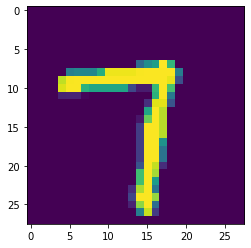

In [46]:
plt.imshow(data[280])
print(label[280])

In [47]:
count = [0]*10
for l in label:
    # print(count[l.item()])
    count[l.item()] += 1
print(count)


[200, 207, 195, 202, 227, 178, 185, 203, 191, 212]


In [3]:
from net import Developmental_Time_Window
from config import Config
A = Developmental_Time_Window(Config.N_hid,
                              Config.k,
                              Config.beta,
                              Config.R_,
                              Config.r,
                              Config.p_self,
                              Config.omega,)

KeyboardInterrupt: 

In [14]:
def a(**kwargs):
    print(kwargs, 'in A')
    def b(**kwargs):
        print(kwargs, 'in B')
    b(**kwargs)
a(a=1)

{'a': 1} in A
{'a': 1} in B


In [9]:
from utils import A_cluster

A = A_cluster(N_hid=100,
                  p_in=0.2,
                  gamma=1.0,
                  binary=False,
                  type='ERC',
                  noise=True,
                  noise_strength=0.2,
                  p_ER=0.2,
                  k=4)

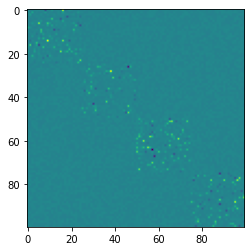

In [10]:
plt.imshow(A)

In [ ]:
# 这段代码废弃了

# STEP1: random coordinates of new nodes
N_coordinates = []
for _ in range(N):
    U_theta = np.random.uniform(0,1)
    l = np.random.uniform(0, R)
    coordinate = [l*np.cos(2*np.pi*U_theta), l*np.sin(2*np.pi*U_theta)]
    N_coordinates.append(coordinate)
N_coordinates = np.array(N_coordinates)

A = np.zeros((N, N), dtype=np.float32) # adjacency matrix
t = 0
for i in range(N):
    t += 1/N
    
    # diagonal = 0, self-connection forbidden
    A[i, i] = 0
    
    # STEP2: associated to nearest pioneer node with same time window w(U)
    xyi = N_coordinates[i, :]
    dis_pioneer = np.sqrt(np.sum((pioneer_nodes - xyi)**2, 1))
    nearest_i = np.argmin(dis_pioneer) + 1
    P_time_U = TimeWindowFunction(t, nearest_i, k, alpha)
    
    # STEP3: decide each edge with former nodes
    sum = 0
    #  if no edge to any existing nodes can be established, the new node is resampled.
    while sum == 0:
        for j in range(0, i):
            
            xyj = N_coordinates[j, :]
            P_dist = DistanceFunction(xyi, xyj) # P distance between U and V
            
            # associated to nearest pioneer node with same time window w(V)
            dis_pioneer = np.sqrt(np.sum((pioneer_nodes - xyj)**2, 1))
            nearest_j = np.argmin(dis_pioneer) + 1
            P_time_V = TimeWindowFunction(t, nearest_j, k, alpha)
            
            if np.random.rand() < P_dist * P_time_U * P_time_V:
                sum += 1
                if np.random.rand() < p: A[i, j] = -1   # inhibitory connection
                else: A[i, j] = 1                       # excitatory connection
                
                if np.random.rand() < p: A[j, i] = -1
                else: A[j, i] = 1
            # print((j, i), (i, j))
print(sum)
plt.imshow(A)

In [12]:
# convert matrix A to networkx Graph

G = nx.Graph()
H = nx.path_graph(N)
G.add_nodes_from(H)
for i in range(N):
    for j in range(N):
        if A[i,j] != 0:
            G.add_edge(i,j)

# delete isolated nodes from graph, otherwise omega(G) and sigma(G) error
tempgraph1 = G.copy()
if nx.is_connected(G) is False:
    G.remove_nodes_from(nx.isolates(tempgraph1))
print('node num: ', len(G.nodes))
print('edge num: ', len(G.edges))

node num:  100
edge num:  560


In [66]:
G.edges()[(0,1)]

{'weight': 0.33706748485565186}

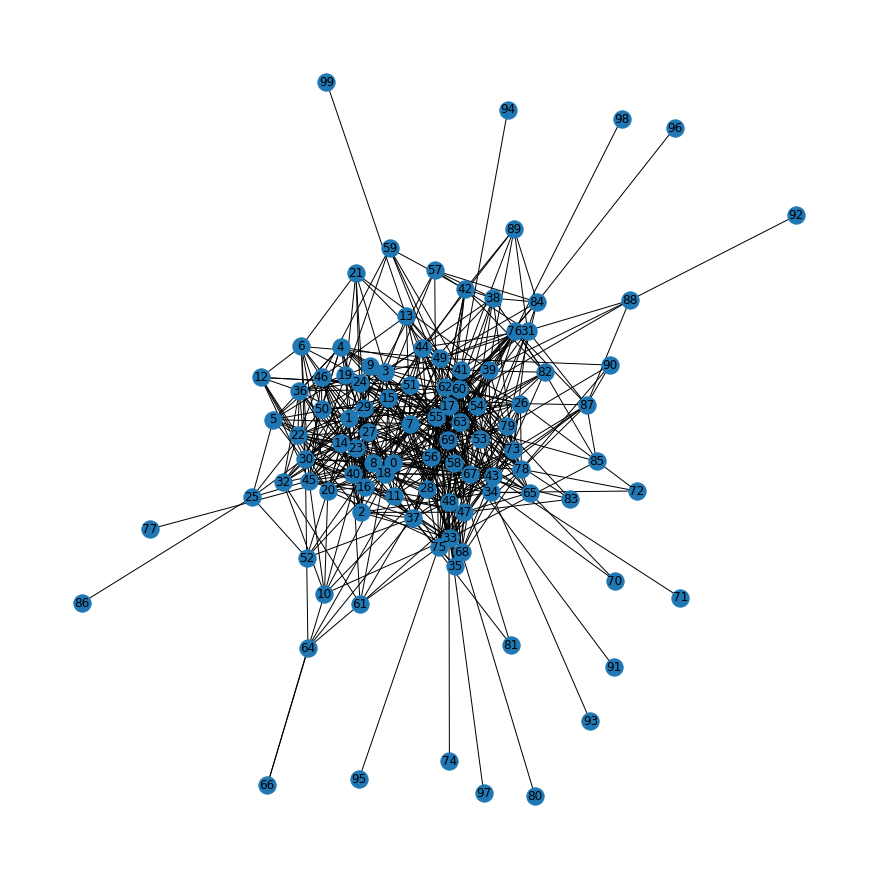

In [13]:
subax1 = plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, font_weight='light',)

In [14]:
from networkx import sigma, omega

# sigma(G, niter=100, nrand=10, seed=None)
# niter: 每条边重新布线的近似次数，以计算等价的随机图。
# nrand: 生成的用于计算平均聚类系数(CR)和平均最短路径长度(LR)的随机图的数量。
# more details from https://www.osgeo.cn/networkx/reference/algorithms/smallworld.html

print(sigma(G, niter=10, nrand=2)) # sigma(G)>1 for small world network
print(omega(G, niter=10, nrand=2)) # omega(G)->0 for small world property

1.2371272742554824
0.6390952466978117


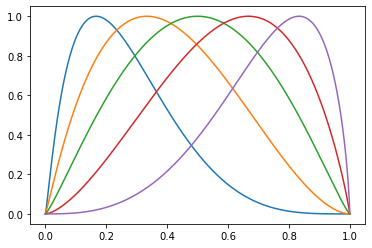

In [10]:
def TimeWindowFunction(t, i, k, alpha):
    # 改成gamma分布
    mu = i / (k+1)
    lamda = -math.log(2, mu) # -np.log2(2)/np.log2(mu), 换底公式
    return (16 * t**(2*lamda) * ((t**lamda-1)**2))**(alpha/mu)

T = np.arange(0, 1.001, 0.001)
y = []
for t in T:
    y.append([TimeWindowFunction(t, j, 5, 0.3) for j in range(1,6)])
y = np.array(y)
plt.plot(T, y[:,0])
plt.plot(T, y[:,1])
plt.plot(T, y[:,2])
plt.plot(T, y[:,3])
plt.plot(T, y[:,4])

In [5]:
config = {
    'alpha':0.5,
    'decay':0.5,
    'thr': 1.2,
    'R': 0.05,
    'p': 0.25,
    'gamma': 1.0,
}
model = config_model(config)
# print(1000**2-(model.A==0).sum())
# print(spectral_radius(model.A))
rollout(config)

0.15333333333333332 0.115


{'objs': (-0.115,)}

In [ ]:
train_loader, test_loader = MNIST_generation(train_num=100,
                                             test_num=250,
                                             batch_size=13)

inference(model, train_loader, frames=20)

t = time.time()
rollout(config)
print(time.time()-t)

1.0000000000000016


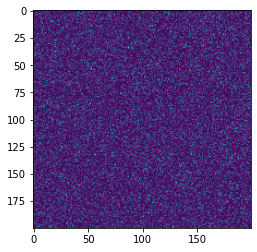

In [34]:
gamma_list = [np.random.gamma(1.0) for _ in range(40000)]
gamma_m = np.array(gamma_list).reshape(200,200)
gamma_m /= spectral_radius(gamma_m)
print(spectral_radius(gamma_m))
plt.imshow(gamma_m)
# plt.hist(gamma_list,bins=100)